In [1]:
from typing import Tuple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline

In [2]:
pd.options.mode.chained_assignment = None 
data = pd.read_csv('data.csv', sep=',', index_col='id')

In [4]:
years = [13, 14, 15, 16, 17]
data_by_course = [
    data[['year', 'calculus', 'algebra', 'discrete']],
    data[['year', 'ode', 'mechanics', 'complex']],
    data[['year', 'prob_and_stat', 'pde', 'functional']],
    data[['year', 'optimization', 'random_proc', 'numerical']]
]
# contains {1 course: {13 year: [(3, count 29), (4, count 11), (5, count 20)], 14 year: [(3, count, 36...
rating_proportional_by_year = dict()
# contains {1 course: {13 year: mean value 3.48, 14 year: mean value 4.13, 15 year ...
mean_rating_by_year = dict()
# contains {1 course: {13 year: 143, 14 year: 159 ...
total_rating_by_year = dict()
i = 1

for course in data_by_course:
    rating_proportional_by_year[i] = {}
    mean_rating_by_year[i] = {}
    total_rating_by_year[i] = {}
    
    for year in years:
        proportional_df = course[course['year'] == year].drop(columns=['year'])
        mean_df = proportional_df.copy()
        total_df = proportional_df.copy()

        proportional_df = proportional_df.apply(lambda x: x.value_counts())
        proportional_df = proportional_df.sum(axis=1)
        
        mean_df = mean_df.apply(lambda x: x.mean())
        # because each course consist of 3 subject
        mean_df = mean_df.sum() / 3
        
        # sum by column => sum by row
        total_df = total_df.sum().sum()
        
        proportional_df.astype(int)
        
        if not proportional_df.empty:
            rating_proportional_by_year[i][int(year+1)] = proportional_df
        if mean_df != 0 or total_df != 0:
            mean_rating_by_year[i][int(year+1)] = mean_df
            total_rating_by_year[i][int(year+1)] = total_df
    i += 1


#### Динамика успеваемости по каждому курсу


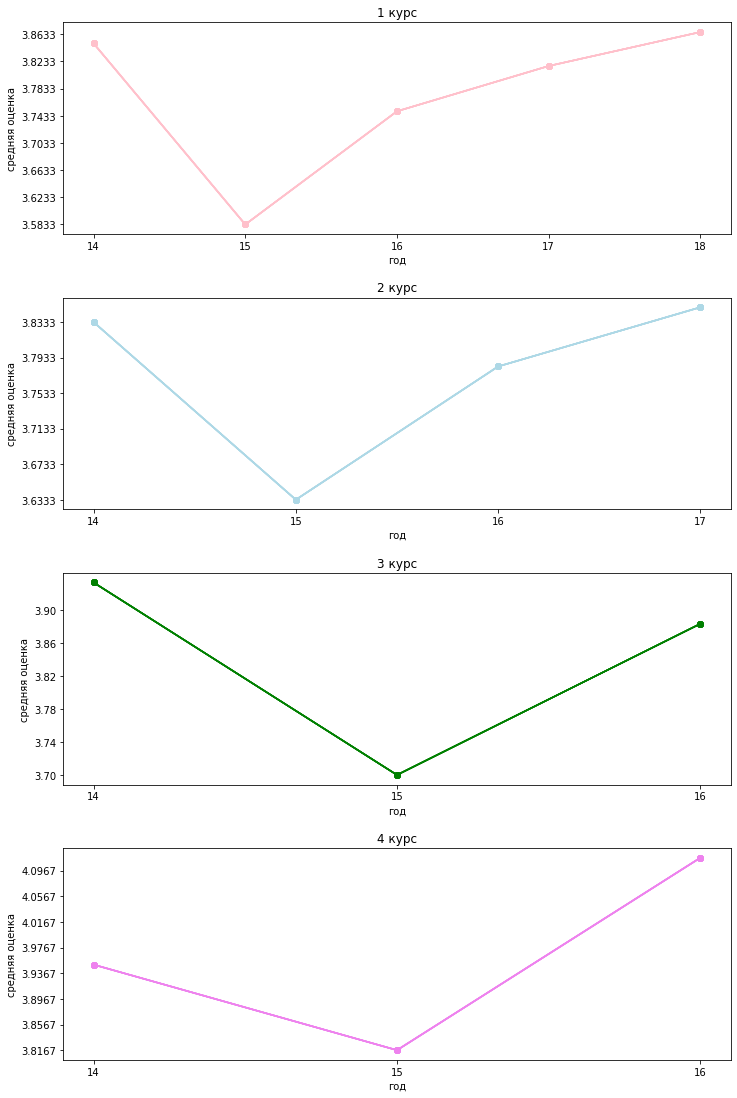

In [67]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))
fig.tight_layout()
fig.subplots_adjust(hspace=0.3)
colors = ['pink', 'lightblue', 'green', 'violet']
   

for i in range(4):
    for year in years:
        x = list(mean_rating_by_year[i+1].keys())
        y = list(mean_rating_by_year[i+1].values())
        
        try:
            none_index = y.index(None)
            x = x[:none_index]
            y = y[:none_index]
        except ValueError:
            pass
        
        axes[i].errorbar(x, y, color=colors[i], marker='o')
        # axes[i].bar(x, y, width=0.9, color=colors[i])
        
        axes[i].set_title(f"{i+1} курс")
        axes[i].set_xlabel('год')
        axes[i].set_ylabel('средняя оценка')
        
        axes[i].set_xticks(np.arange(min(x), max(x)+1, 1.0))
        axes[i].set_yticks(np.arange(min(y), max(y), 0.04))

In [68]:
ege_data = data[['year', 'ege']]
mean_ege_by_year = dict()

for year in years:
    mean_df = ege_data[ege_data['year'] == year].drop(columns=['year'])
    mean_ege_by_year[year] = int(mean_df.mean().values)

#### Динамика баллов ЕГЭ

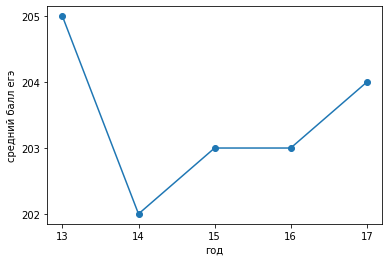

In [69]:
x = mean_ege_by_year.keys()
y = mean_ege_by_year.values()

# plt.bar(x, y)
plt.xlabel('год')
plt.ylabel('средний балл егэ')
plt.errorbar(x, y, marker='o')
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.yticks(np.arange(min(y), max(y)+1, 1))
plt.show()

In [80]:
for course, ratings in rating_proportional_by_year.items():
    df = pd.DataFrame(ratings)

,14,15,16
3.0,22,26,13
4.0,19,19,27
5.0,19,15,20
